In [1]:
# Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # for removing warnings

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [ ]:
df = pd.read_csv(file_path)
     # Feature Engineering
df['Amount_Mismatch'] = df['Transaction_Amount'] - df['Amount_paid']
df['Vehicle_Profile'] = df['Vehicle_Type'] + '_' + df['Vehicle_Dimensions']
df['High_Speed'] = df['Vehicle_Speed'] > 80  # Boolean feature

    # One-hot encode relevant categorical columns
df_encoded = pd.get_dummies(df[['Lane_Type', 'Vehicle_Profile', 'State_code']], drop_first=True)

    # Combine numeric and encoded features
    X = pd.concat([
        df[['Amount_Mismatch', 'Vehicle_Speed', 'High_Speed']],
        df_encoded
    ], axis=1)

    # Target variable
    y = df['Fraud_indicator']
    

In [3]:
df = pd.read_csv('cleaned_data.csv')
# Amount Mismatch
df['Amount_Mismatch'] = df['Transaction_Amount'] - df['Amount_paid']
# Vehicle Profile
df['Vehicle_Profile'] = df['Vehicle_Type'] + '_' + df['Vehicle_Dimensions']
# High-Speed Flag (optional threshold e.g., 80 km/h)
df['High_Speed'] = df['Vehicle_Speed'] > 80

df.head()


,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Hour,DayOfWeek,State_code,Amount_Mismatch,Vehicle_Profile,High_Speed
0,Bus,A-101,Express,Large,350,120,65,1,11,4,KA,230,Bus _Large,False
1,Car,B-102,Regular,Small,120,100,78,1,14,5,KA,20,Car_Small,False
2,Motorcycle,D-104,Regular,Small,0,0,53,0,18,6,KA,0,Motorcycle_Small,False
3,Truck,C-103,Regular,Large,350,120,92,1,2,0,KA,230,Truck_Large,True
4,Van,B-102,Express,Medium,140,100,60,1,6,1,KA,40,Van_Medium,False


In [6]:
df_encoded = pd.get_dummies(df[['Lane_Type', 'Vehicle_Profile', 'State_code']], drop_first=True)
X = pd.concat([
        df[['Amount_Mismatch', 'Vehicle_Speed', 'High_Speed']],
        df_encoded
    ], axis=1)

    # Target variable
y = df['Fraud_indicator']
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
4995    0
4996    0
4997    0
4998    0
4999    1
Name: Fraud_indicator, Length: 5000, dtype: int64


In [32]:
X = pd.concat([
    df[['Amount_Mismatch', 'Vehicle_Speed', 'High_Speed']],
    df_encoded
], axis=1)

y = df['Fraud_indicator']


In [26]:
df.head(1)

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Vehicle_Speed,Fraud_indicator,Hour,DayOfWeek,State_code,Amount_Mismatch
0,Bus,A-101,Express,Large,350,120,65,1,11,4,KA,230


In [24]:
df[df['Fraud_indicator'] == 0].count()

Vehicle_Type          4017
TollBoothID           4017
Lane_Type             4017
Vehicle_Dimensions    4017
Transaction_Amount    4017
Amount_paid           4017
Vehicle_Speed         4017
Fraud_indicator       4017
Hour                  4017
DayOfWeek             4017
State_code            4017
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Vehicle_Type        5000 non-null   object
 1   TollBoothID         5000 non-null   object
 2   Lane_Type           5000 non-null   object
 3   Vehicle_Dimensions  5000 non-null   object
 4   Transaction_Amount  5000 non-null   int64 
 5   Amount_paid         5000 non-null   int64 
 6   Vehicle_Speed       5000 non-null   int64 
 7   Fraud_indicator     5000 non-null   int64 
 8   Hour                5000 non-null   int64 
 9   DayOfWeek           5000 non-null   int64 
 10  State_code          5000 non-null   object
dtypes: int64(6), object(5)
memory usage: 429.8+ KB


In [11]:
dataframe = pd.read_csv('FastagFraudDetection.csv')
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [7]:
dataframe.head(1)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud


In [5]:
dataframe.shape

(5000, 13)

### Exploratory Data Analysis (EDA): Identified hidden patterns and anomalies in transaction data.

In [8]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [9]:
dataframe.isnull().sum() #check for total null values in dataframe

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [10]:
dataframe.duplicated().sum() #check for duplicate values if any

0

In [11]:
dataframe.describe() # for numerical features

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


In [10]:
dataframe.describe(include="object") # describe or get the statictistcal description for numarical + categorical features

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


## Observation 1
### 1 . Fastag ID has 549 Null values

### 2 . No Duplicate values

### 3 . Datatypes are almost correct

In [13]:
dataframe.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [14]:
# Unique values
print("Unique Vehicle Type: ",dataframe["Vehicle_Type"].unique())
print("Unique TollBoothID: ",dataframe["TollBoothID"].unique())
print("Unique Lane Type: ",dataframe["Lane_Type"].unique())
print("Unique Vehicle Dimensions: ",dataframe["Vehicle_Dimensions"].unique())
print("Unique Fraud indicator: ",dataframe["Fraud_indicator"].unique())
print("Unique Geographical Location: ",dataframe["Geographical_Location"].unique())

Unique Vehicle Type:  ['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']
Unique TollBoothID:  ['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']
Unique Lane Type:  ['Express' 'Regular']
Unique Vehicle Dimensions:  ['Large' 'Small' 'Medium']
Unique Fraud indicator:  ['Fraud' 'Not Fraud']
Unique Geographical Location:  ['13.059816123454882, 77.77068662374292'
 '13.042660878688794, 77.47580097259879'
 '12.84197701525119, 77.67547528176169'
 '12.936687032945434, 77.53113977439017'
 '13.21331620748757, 77.55413526894684']


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

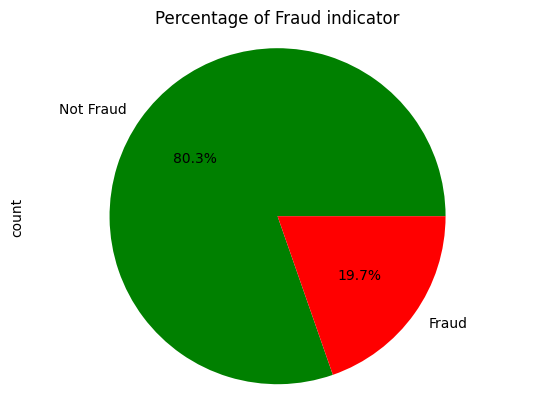

In [16]:
# percentage of fraud and not fraud
# print(dataframe["Fraud_indicator"].value_counts())
dataframe["Fraud_indicator"].value_counts().plot(kind = "pie",autopct = "%1.1f%%",colors = ["green","red"])
plt.title("Percentage of Fraud indicator")
plt.axis("equal")
plt.show()

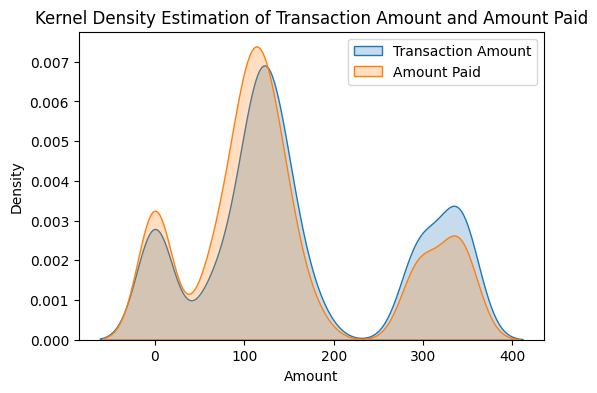

In [17]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=dataframe['Transaction_Amount'], fill=True, label='Transaction Amount')
sns.kdeplot(data=dataframe['Amount_paid'], fill=True, label='Amount Paid')
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Transaction Amount and Amount Paid')
plt.legend()
plt.show()

In [18]:
# dataframe.hist(figsize=(10, 8), bins=20)
# plt.show()

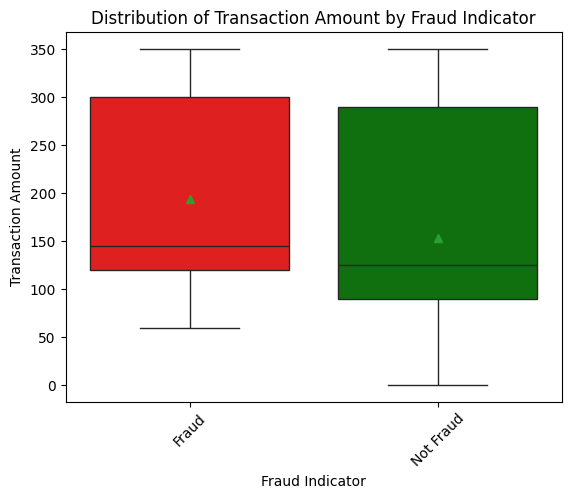

In [19]:
sns.boxplot(
    x = "Fraud_indicator",
    y = "Transaction_Amount",
    showmeans=True,
    data=dataframe,
    palette=["red", "green"]
)

plt.xlabel("Fraud Indicator")
plt.ylabel("Transaction Amount")
plt.title("Distribution of Transaction Amount by Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

**Correlation matrix and heatmap for numerical variables**

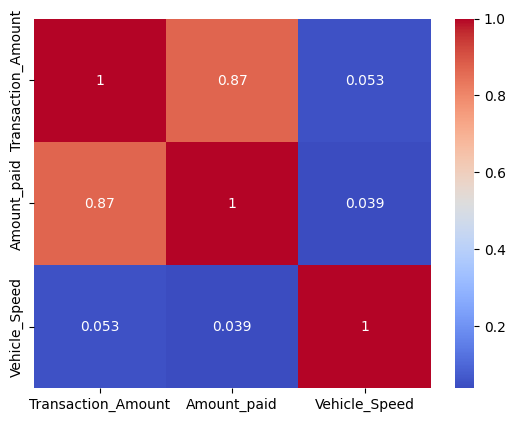

In [20]:
correlation_matrix = dataframe[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

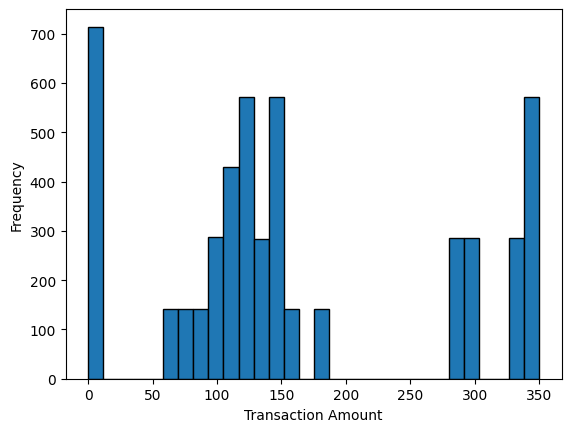

In [21]:
plt.hist(dataframe['Transaction_Amount'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

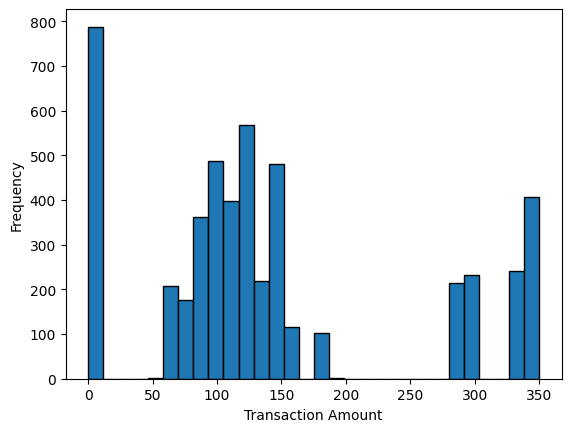

In [22]:
plt.hist(dataframe['Amount_paid'], bins=30, edgecolor='black')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

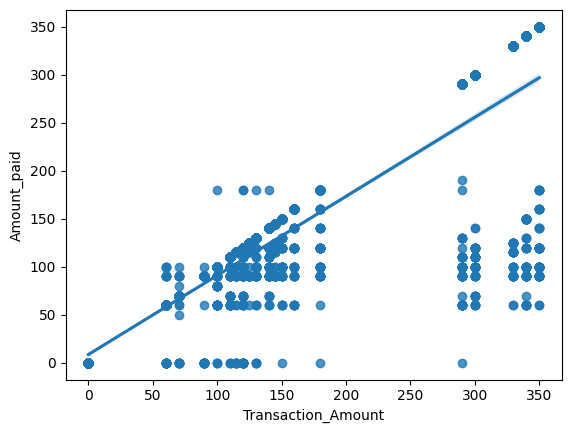

In [23]:
sns.regplot(x='Transaction_Amount', y='Amount_paid', data=dataframe)
plt.show()

Text(0.5, 1.0, 'Vechcle Types')

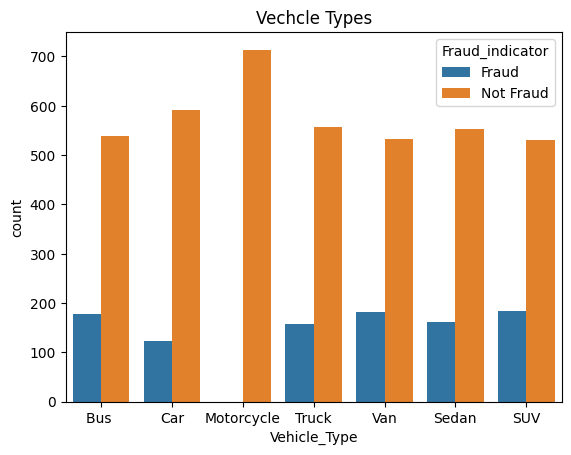

In [24]:
sns.countplot(data=dataframe,x="Vehicle_Type",hue="Fraud_indicator").set_title("Vechcle Types") #Vehicle Types

Text(0.5, 1.0, 'Vehicle Dimensions')

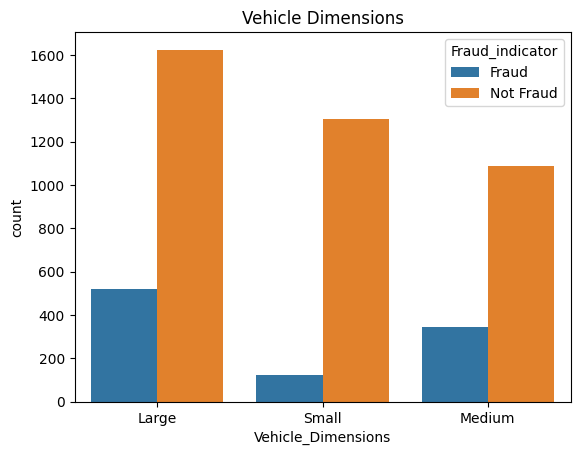

In [25]:
#Vehicle Dimensions
# plt.Figure(figsize=(6,5))
sns.countplot(data=dataframe,x="Vehicle_Dimensions",hue="Fraud_indicator").set_title("Vehicle Dimensions")

Text(0.5, 1.0, 'Different Toll Booths')

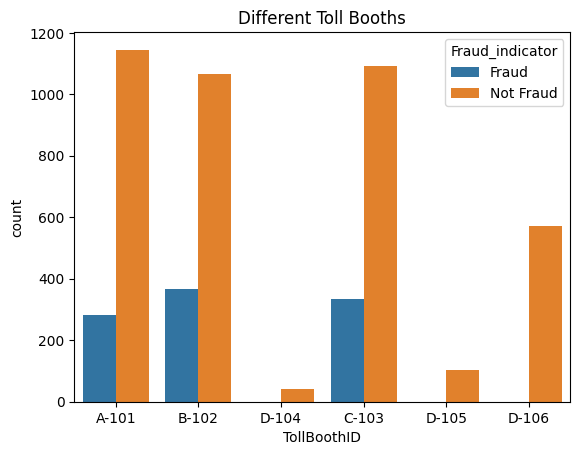

In [26]:
# Different Toll Booths
# plt.figure(figsize=(6,5))
sns.countplot(data=dataframe,x="TollBoothID",hue="Fraud_indicator").set_title("Different Toll Booths")

Text(0.5, 1.0, 'Different Lanes')

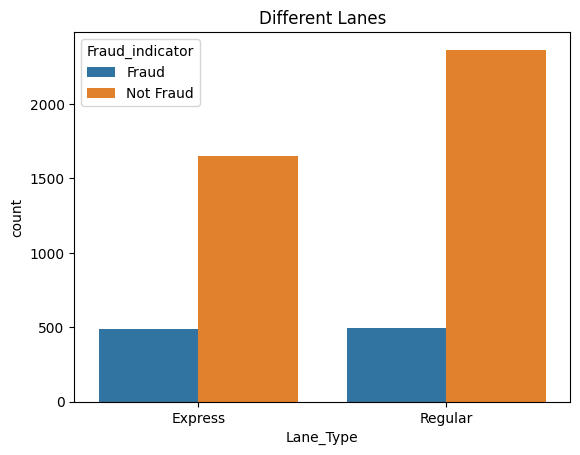

In [27]:
# Lane Type
# plt.figure(figsize=(6,5))
sns.countplot(data=dataframe,x="Lane_Type",hue="Fraud_indicator").set_title("Different Lanes")

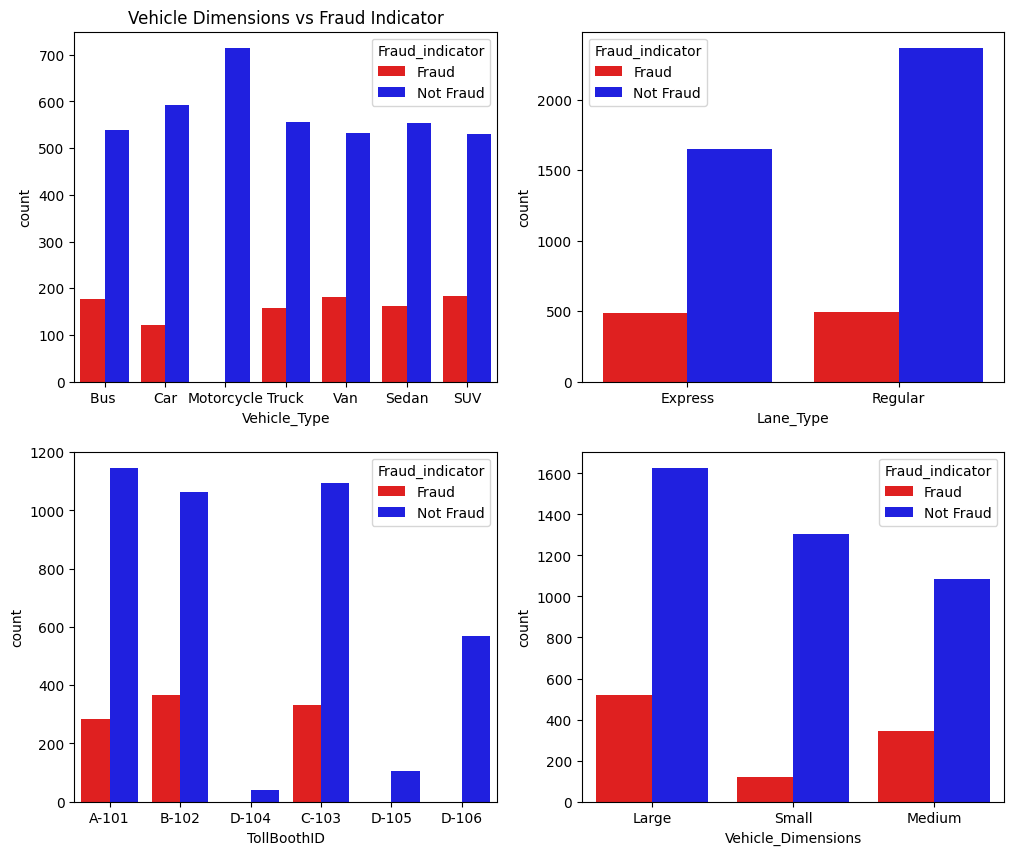

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

In [28]:
# Combine all graphs together

fig , axes = plt.subplots(2,2,figsize = (12,10),squeeze=False)
palette = {'Fraud': 'red', 'Not Fraud': 'blue'}
#Vehicle Types vs Fraud Indicator
sns.countplot(x="Vehicle_Type",data=dataframe,hue="Fraud_indicator",ax=axes[0,0],palette=palette)
#Lane Types vs vs Fraud Indicator
sns.countplot(x="Lane_Type",data=dataframe,hue="Fraud_indicator",ax=axes[0,1],palette=palette)
#Different Toll Booths vs Fraud Indicator
plt.figure(figsize=(6,5))
sns.countplot(x="TollBoothID",data=dataframe,hue="Fraud_indicator",ax=axes[1,0],palette=palette)
#Vehicle Dimenstions vs Fraud Indicator
plt.figure(figsize=(6,5))
sns.countplot(x="Vehicle_Dimensions",data=dataframe,hue="Fraud_indicator",ax=axes[1,1],palette=palette)

axes[0,0].set_title("Vehicle Type vs Fraud Indicator")
axes[0,0].set_title("Lane Type vs Fraud Indicator")
axes[0,0].set_title("Toll Booths vs Fraud Indicator")
axes[0,0].set_title("Vehicle Dimensions vs Fraud Indicator")
plt.tight_layout()
plt.show()

In [29]:
#Convert timestamp into dataframe
dataframe["Timestamp"] = pd.to_datetime(dataframe["Timestamp"])

dataframe["Hour"] = dataframe["Timestamp"].dt.hour
dataframe["DayOfWeek"] = dataframe["Timestamp"].dt.dayofweek
dataframe["Month"] = dataframe["Timestamp"].dt.month
dataframe[['Latitude', 'Longitude']] = dataframe['Geographical_Location'].str.split(',', expand=True).astype(float)

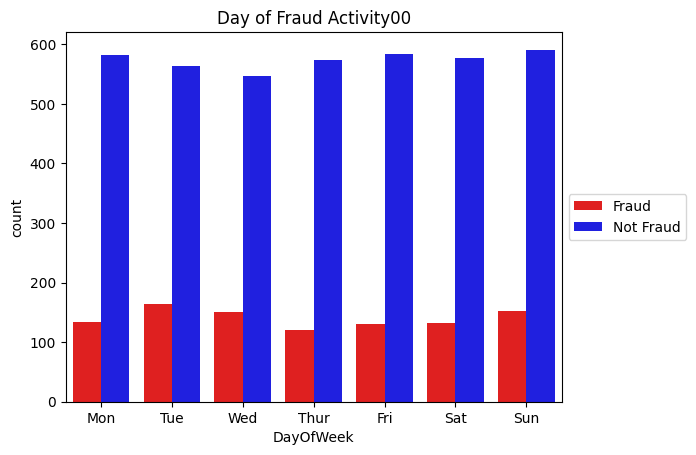

In [30]:
#visualise based in days
# plt.figure(figsize=(8,3))
sns.countplot(data=dataframe,x="DayOfWeek",hue="Fraud_indicator", palette= palette)
plt.title("Day of Fraud Activity00")
plt.legend(loc="center left",bbox_to_anchor = (1,0.5))
plt.xticks([0,1,2,3,4,5,6],["Mon","Tue","Wed","Thur","Fri","Sat","Sun"])
plt.show()

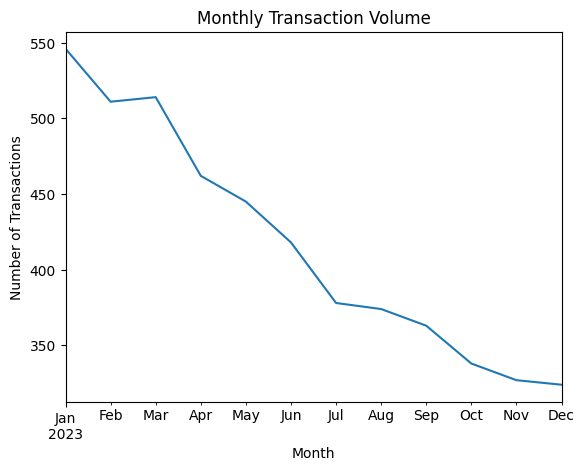

In [31]:
dataframe.set_index('Timestamp').resample('M')['Transaction_ID'].count().plot()
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()
# add monthly fraud vs not fraud plot 

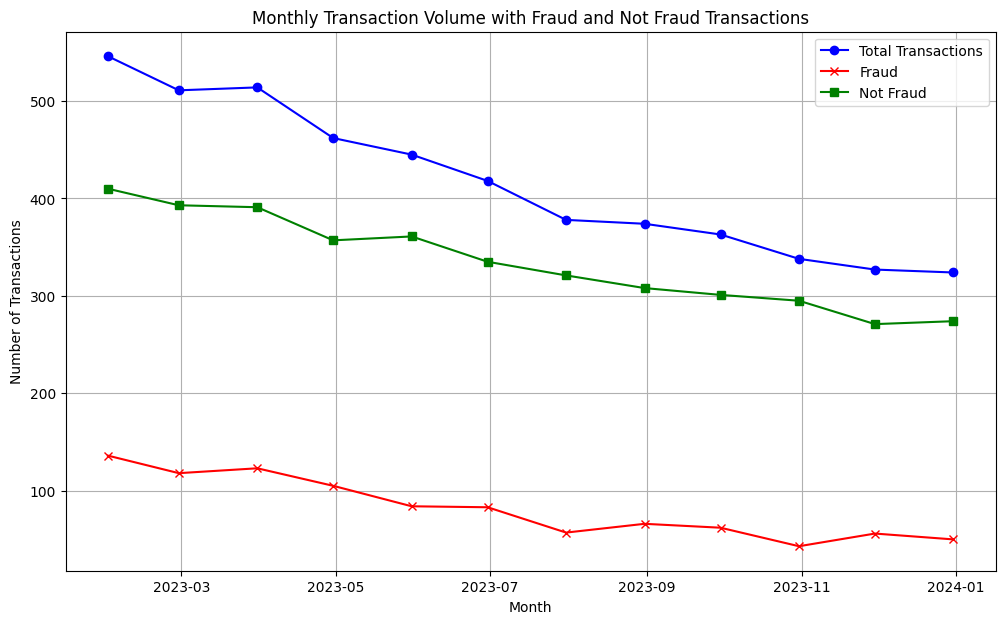

In [32]:

# Set Timestamp as index
dataframe.set_index('Timestamp', inplace=True)

# Calculate total transactions per month
total_transactions = dataframe.resample('M')['Transaction_ID'].count()

# Calculate fraud and non-fraud transactions
monthly_fraud_data = dataframe.resample('M')['Fraud_indicator'].value_counts().unstack().fillna(0)

# Plot all in one graph
plt.figure(figsize=(12, 7))

# Plot Total Transactions
plt.plot(total_transactions, label='Total Transactions', marker='o', color='blue')

# Plot Fraud and Not Fraud Transactions
plt.plot(monthly_fraud_data['Fraud'], label='Fraud', marker='x', color='red')
plt.plot(monthly_fraud_data['Not Fraud'], label='Not Fraud', marker='s', color='green')

# Add titles and labels
plt.title('Monthly Transaction Volume with Fraud and Not Fraud Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(loc='upper right')
plt.grid(True)

# Show the plot
plt.show()


## Relationship betweeen transaction amount and paid amount¶

In [33]:
# dataframe['Fraud_indicator'].unique()
# dataframe['Latitude'].unique()

In [34]:
# Convert 'Fraud' to 1 and 'Not Fraud' to 0
dataframe['Fraud_indicator'] = dataframe['Fraud_indicator'].map({'Fraud': 1, 'Not Fraud': 0})

location_fraud_count = dataframe.groupby(['Latitude', 'Longitude'])['Fraud_indicator'].sum().reset_index()
location_fraud_count.rename(columns={'Fraud_indicator': 'Fraud_Count'}, inplace=True)
location_fraud_count['Total_Transactions'] = dataframe.groupby(['Latitude', 'Longitude'])['Fraud_indicator'].count().values
location_fraud_count['Fraud_Rate'] = location_fraud_count['Fraud_Count'] / location_fraud_count['Total_Transactions']
high_fraud_locations = location_fraud_count[location_fraud_count['Fraud_Rate'] > 0.2]
# print(high_fraud_locations)
dataframe['High_Risk_Area'] = dataframe.apply(
    lambda row: (row['Latitude'], row['Longitude']) in list(zip(high_fraud_locations['Latitude'], high_fraud_locations['Longitude'])),
    axis=1
)
dataframe['High_Risk_Area'].value_counts()

High_Risk_Area
False    3000
True     2000
Name: count, dtype: int64

In [35]:
print("\nDetailed Statistics of High Risk Areas:")
print(location_fraud_count)

# Filter and display only those locations where the fraud rate exceeds a specified threshold, indicating high risk.
high_risk_threshold = 0.2  # Threshold can be adjusted based on requirement
high_risk_areas = location_fraud_count[location_fraud_count['Fraud_Rate'] > high_risk_threshold]
print(f"\nLocations with a Fraud Rate greater than {high_risk_threshold}:")
print(high_risk_areas)

# Print additional details if needed
if not high_risk_areas.empty:
    print("\nHigh Risk Area Details:")
    for index, row in high_risk_areas.iterrows():
        print(f"Location (Latitude: {row['Latitude']}, Longitude: {row['Longitude']}) has a fraud count of {row['Fraud_Count']} out of {row['Total_Transactions']} transactions, resulting in a fraud rate of {row['Fraud_Rate']:.2f}.")
else:
    print("\nNo high-risk areas detected above the threshold.")


Detailed Statistics of High Risk Areas:
    Latitude  Longitude  Fraud_Count  Total_Transactions  Fraud_Rate
0  12.841977  77.675475          231                1000       0.231
1  12.936687  77.531140          168                1000       0.168
2  13.042661  77.475801          199                1000       0.199
3  13.059816  77.770687          246                1000       0.246
4  13.213316  77.554135          139                1000       0.139

Locations with a Fraud Rate greater than 0.2:
    Latitude  Longitude  Fraud_Count  Total_Transactions  Fraud_Rate
0  12.841977  77.675475          231                1000       0.231
3  13.059816  77.770687          246                1000       0.246

High Risk Area Details:
Location (Latitude: 12.84197701525119, Longitude: 77.67547528176169) has a fraud count of 231.0 out of 1000.0 transactions, resulting in a fraud rate of 0.23.
Location (Latitude: 13.059816123454882, Longitude: 77.77068662374292) has a fraud count of 246.0 out of 100

### Conclusion:
#### The analysis has identified specific geographic locations with high fraud rates. These areas should be targeted with enhanced security measures and closer monitoring to mitigate fraud risks.

#### Next Steps:
#### 1. Implement targeted fraud prevention strategies in high-risk areas.
#### 2. Regularly update and re-analyze the data to monitor the effectiveness of implemented measures.
#### 3. Explore additional data features that could further refine fraud detection accuracy.
#### 4. Consider deploying real-time fraud detection systems at identified high-risk locations.

## Observation 2
### 1. Toll Booths 104,105,and 106 have no fraud detected but 101,102,103 have mix data

### 2 . Express ways has higher fraud percentage based on vehicles than regular ways

### 3 . very less small vehicles are involved in fraud

### 4 . Motorcycles doesnt have fraud detected

## Distribution of transaction amount

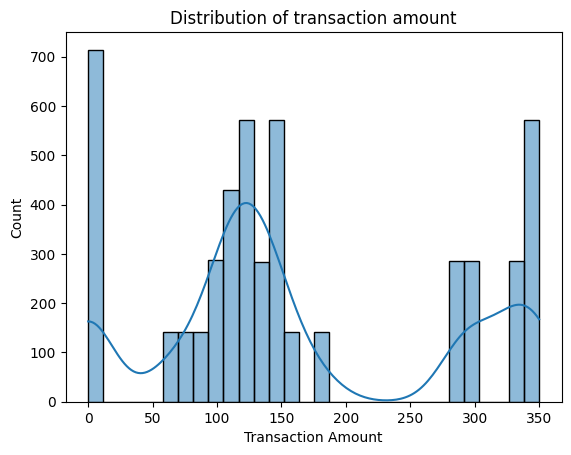

In [36]:
sns.histplot(dataframe["Transaction_Amount"],bins=30,kde=True)
plt.title("Distribution of transaction amount")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()

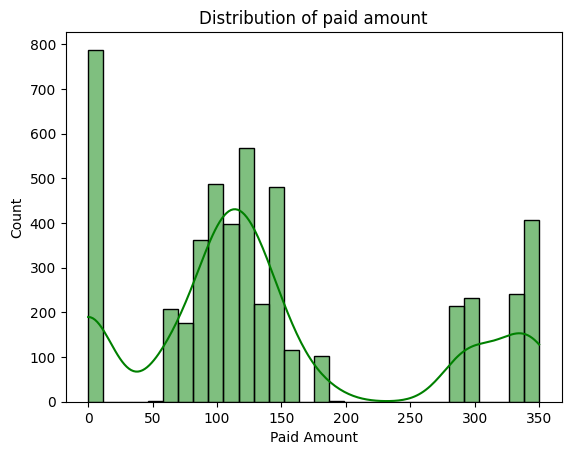

In [37]:
sns.histplot(dataframe["Amount_paid"],bins=30,kde=True,color="green",edgecolor="black")
plt.title("Distribution of paid amount")
plt.xlabel("Paid Amount")
plt.ylabel("Count")
plt.show()

In [38]:
fraud_counts = dataframe['Fraud_indicator'].value_counts()
print(fraud_counts)

Fraud_indicator
0    4017
1     983
Name: count, dtype: int64


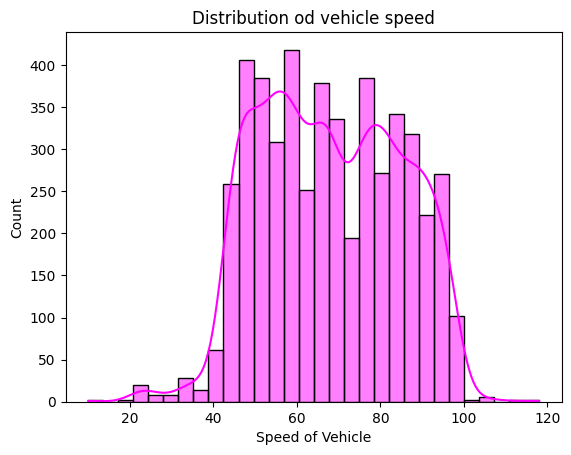

In [39]:
sns.histplot(dataframe["Vehicle_Speed"],bins=30,kde=True,color="magenta",edgecolor = "black")
plt.title("Distribution od vehicle speed")
plt.xlabel("Speed of Vehicle")
plt.ylabel("Count")
plt.show()

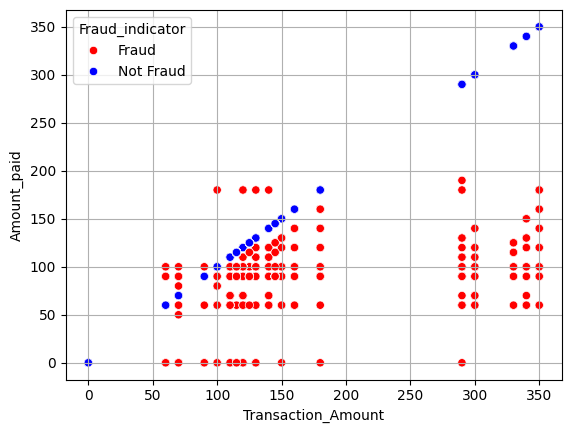

In [40]:
dataframe['Fraud_indicator'] = dataframe['Fraud_indicator'].map({0: "Not Fraud", 1: "Fraud"})

sns.scatterplot(data=dataframe, 
                 x="Transaction_Amount", 
                 y="Amount_paid", 
                 hue="Fraud_indicator",  
                 palette={"Not Fraud": "blue", "Fraud": "red"})
plt.grid()
plt.show()


## Observation 3
### 1 . When Transaction Amount is not equal to Amount Paid ==> Fraud

### 2 . When Transaction Amount is equal to Amount Paid ==> Not Fraud

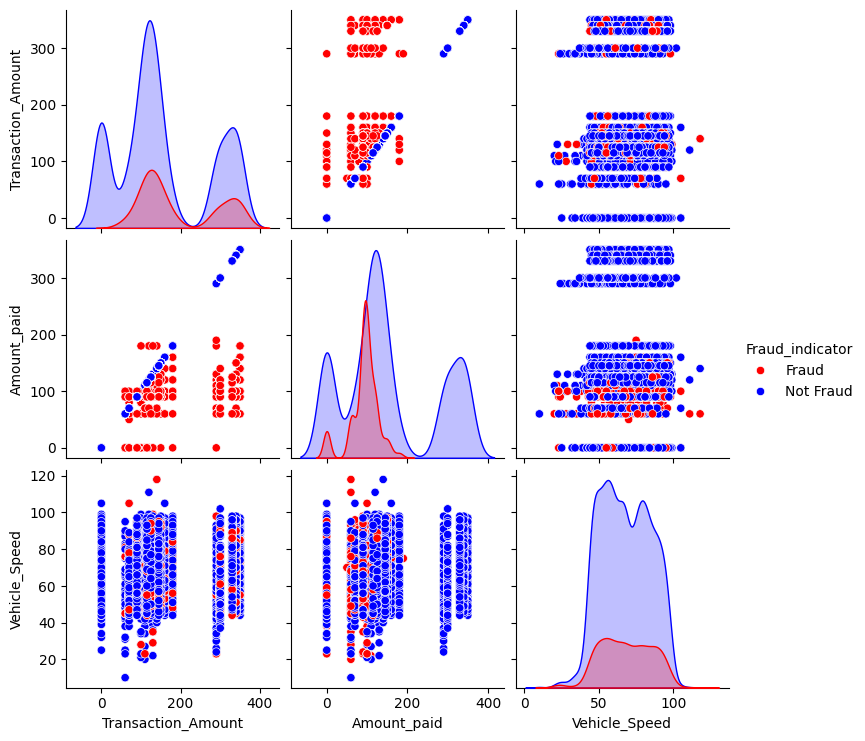

In [41]:
sns.pairplot(dataframe, vars=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'], hue='Fraud_indicator', palette={'Not Fraud': 'blue', 'Fraud': 'red'})
plt.show()

In [ ]:
# sns.pairplot(dataframe, vars = ['Transaction_Amount', 'Amount_paid','Hour','DayOfWeek','Month'],hue='Fraud_indicator', palette={'Not Fraud': 'blue', 'Fraud': 'red'},height=5 ) #Pairplot parameter(kind='kde)'

# 3. Feature Extraction

In [43]:
dataframe["State_code"] = dataframe["Vehicle_Plate_Number"].str[:2]
dataframe.head()

,Transaction_ID,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator,Hour,DayOfWeek,Month,Latitude,Longitude,High_Risk_Area,State_code
Timestamp,,,,,,,,,,,,,,,,,,,
2023-01-06 11:20:00,1,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud,11,4,1,13.059816,77.770687,True,KA
2023-01-07 14:55:00,2,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud,14,5,1,13.059816,77.770687,True,KA
2023-01-08 18:25:00,3,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud,18,6,1,13.059816,77.770687,True,KA
2023-01-09 02:05:00,4,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud,2,0,1,13.059816,77.770687,True,KA
2023-01-10 06:35:00,5,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud,6,1,1,13.059816,77.770687,True,KA


In [44]:
dataframe["State_code"].unique()

array(['KA', 'MH', 'AP', 'GA', 'KL', 'GJ', 'TN', 'DL', 'TS', 'UP', 'RJ',
       'WB', 'MP', 'HR', 'BR'], dtype=object)

In [45]:
#Remove vehicle number plate feature
dataframe  = dataframe.drop("Vehicle_Plate_Number",axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

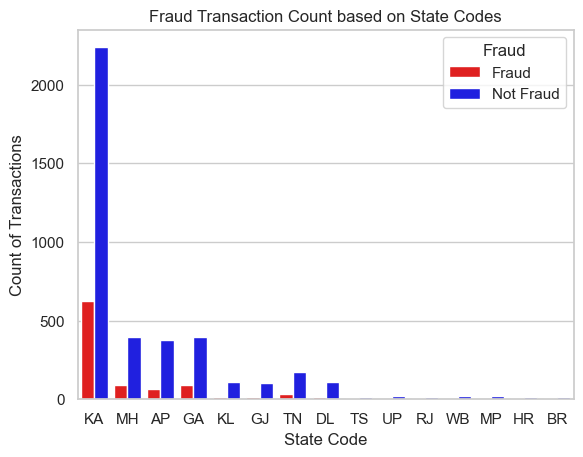

In [46]:
#Visualize fraud based on states
sns.set_theme(style="whitegrid")
# plt.figure(figsize=(12,6))
sns.countplot(data=dataframe,x="State_code",hue="Fraud_indicator",palette=palette)
plt.title("Fraud Transaction Count based on State Codes")
plt.xlabel("State Code")
plt.ylabel("Count of Transactions")
plt.legend(title = "Fraud")
plt.show

In [47]:
dataframe["State_code"].value_counts()

State_code
KA    2860
GA     489
MH     488
AP     447
TN     203
DL     123
KL     121
GJ     119
TS      22
UP      22
RJ      22
WB      21
MP      21
HR      21
BR      21
Name: count, dtype: int64

In [48]:
dataframe.loc[dataframe["Fraud_indicator"]=="Fraud","State_code"].value_counts()

State_code
KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: count, dtype: int64

## Observation 4
### 1 . Highest fraud count is in Karnataka(KA)

In [49]:
# Analysise Timestamp to get the fraud / not fraud based on days
# dataframe["Timestamp"]

In [50]:
dataframe.drop(['Geographical_Location'], axis=1, inplace=True)
dataframe.drop("Timestamp",axis=1) #drop timestamp feature

KeyError: "['Timestamp'] not found in axis"

In [ ]:
dataframe

### Correlation Matrix

In [ ]:
numaricalDF = dataframe.select_dtypes("number") # only numerical data

In [ ]:
corr_matrix = numaricalDF.corr()
corr_matrix

In [ ]:
#plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,fmt=".2f")
plt.title("Correlation Matrix(Correlation Heatmap of Numerical Features)")
plt.show()

In [ ]:
# dataframe.info()

In [ ]:
dataframe.drop(['Transaction_ID','FastagID'],axis=1,inplace=True) #removing unnecessary columns

In [ ]:
dataframe.info()

In [ ]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
object_columns = ['Vehicle_Type','Lane_Type','Vehicle_Dimensions','TollBoothID', 'State_code','Fraud_indicator']
#list of object columns
label_encoder = {}
for column in object_columns:
    le = LabelEncoder()
    dataframe[column] = le.fit_transform(dataframe[column])
    label_encoder[column] = le

In [ ]:
dataframe.head()

In [ ]:
label_encoder["Fraud_indicator"].classes_

## Model Training

In [ ]:
X = dataframe.drop(columns=["Fraud_indicator"])
y = dataframe["Fraud_indicator"]

In [ ]:
#Split the X and y in train and testing
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train , y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [ ]:
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

# Logistic Regression

In [ ]:
# import the model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model

In [ ]:
lr_model.fit(X_train,y_train)

In [ ]:
#Predict
y_pred = lr_model.predict(X_test)
y_pred

# Model Evaluation

In [ ]:
#import libraries for matrics
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score , f1_score , confusion_matrix

In [ ]:
#Classification report
print(classification_report(y_test,y_pred))

In [ ]:
#Function to evaluate model
# def evaluate_model(y_test,y_pred):
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)


print("LR model results:\n")
print("Accuracy \t : ",accuracy)
print("Confusion matrix : ",conf_matrix)
print("Precision \t : ",precision)
print("Recall score \t : ",recall)
print("F1 score \t : ",f1)

In [ ]:
#testing all models
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier 
from sklearn.tree import DecisionTreeClassifier

## Decision tree

In [ ]:
Tree_model = DecisionTreeClassifier()
Tree_model.fit(X_train,y_train)

y_tree_pred = Tree_model.predict(X_test)
y_tree_pred

In [ ]:
#Accuracy of Decision Tree
print("Decision Tree model evaluation:\n")
accuracy = accuracy_score(y_test,y_tree_pred)
Confusion_matrix = confusion_matrix(y_test,y_tree_pred)
Precision = precision_score(y_test,y_tree_pred)
recall = recall_score(y_test,y_tree_pred)
f1 = f1_score(y_test,y_tree_pred)
print("Accuracy \t : ",accuracy)
print("Confusion Matrix : ",Confusion_matrix)
print("Precision \t : ",Precision)
print("Recall score \t : ",recall)
print("F1 Score \t : ",f1)

## Support Vector Machine

In [ ]:
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score , f1_score , confusion_matrix
svc_model = SVC()
svc_model.fit(X_train,y_train)

In [ ]:
y_pred_svc_model = svc_model.predict(X_test)

print("Support Vector Classifier Model Evaluation:\n")
accuracy_svm = accuracy_score(y_test,y_pred_svc_model)
Confusion_matrix_svm = confusion_matrix(y_test,y_pred_svc_model)
Precision_svm= precision_score(y_test,y_pred_svc_model)
recall_svm = recall_score(y_test,y_pred_svc_model)
f1_svm= f1_score(y_test,y_pred_svc_model)
print("Accuracy \t : ",accuracy_svm)
print("Confusion Matrix : ",Confusion_matrix_svm)
print("Precision \t : ",Precision_svm)
print("Recall score \t : ",recall_svm)
print("F1 Score \t : ",f1_svm)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_predictions = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svc_model)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

In [ ]:
rf_y_pred = rf_model.predict(X_test)

print("Random Forest Classifier Model Evaluation:\n")
accuracy_rf = accuracy_score(y_test,rf_y_pred)
Confusion_matrix_rf = confusion_matrix(y_test,rf_y_pred)
Precision_rf= precision_score(y_test,rf_y_pred)
recall_rf = recall_score(y_test,rf_y_pred)
f1_rf= f1_score(y_test,rf_y_pred)
print("Accuracy \t :  ",accuracy_rf)
print("Confusion Matrix : ",Confusion_matrix_rf)
print("Precision \t : ",Precision_rf)
print("Recall score \t : ",recall_rf)
print("F1 Score \t : ",f1_rf)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)

In [ ]:
knn_y_pred  = knn_model.predict(X_test)

print("KNN Classifier Model Evaluation:\n")
accuracy = accuracy_score(y_test,knn_y_pred)
Confusion_matrix = confusion_matrix(y_test,knn_y_pred)
Precision = precision_score(y_test,knn_y_pred)
recall = recall_score(y_test,knn_y_pred)
f1 = f1_score(y_test,knn_y_pred)
print("Accuracy ",accuracy)
print("Confusion Matrix",Confusion_matrix)
print("Precision",Precision)
print("Recall",recall)
print("F1 Score",f1)

In [ ]:
#Lets Visualisie

models = ["Logisitic Regression","Decision Tree","Random Forest","SVM","KNN"]
accuracy_scores = [0.98,0.99,0.97,0.97,0.98]
colors = ["blue","purple","magenta","green","orange"]
plt.figure(figsize=(12,6))


plt.bar(models,accuracy_scores,color = colors)
plt.xlabel("ML MODLES")
plt.ylabel("Accuracy Scores")
plt.title("Comparison of Accuracy Scores of Different Models")

## Conclusion
### 1 . Decision Tree . highest accuracy (99%) . overall top performing model

In [55]:
dataframe['State_code'].unique()

array(['KA', 'MH', 'AP', 'GA', 'KL', 'GJ', 'TN', 'DL', 'TS', 'UP', 'RJ',
       'WB', 'MP', 'HR', 'BR'], dtype=object)

In [56]:
dataframe['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10,  7, 11, 12])